### Step 1: Setting up the environment

In [1]:
%pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


### Step 2: Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 3: Load and Explore the Dataset

In [3]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Display the shape of the dataset
print(f'Dataset shape: {X.shape}')
print(f'Target shape: {y.shape}')

# Display the first few rows of the dataset
print(X.head())
print(y.head())

Dataset shape: (70000, 784)
Target shape: (70000,)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781

In [4]:
# Convert target to integers
y = y.astype(np.int8)

### Step 4: Preprocess the Data

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')


Training set size: 56000 samples
Testing set size: 14000 samples


In [6]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 5: Train a Logistic Regression Model

In [7]:
# Create the logistic regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

c:\Users\Sambhav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

### Step 6: Make Predictions

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Display the first few predictions
print('First few predictions:', y_pred[:5])
print('First few actual values:', y_test.values[:5])

First few predictions: [8 4 5 7 7]
First few actual values: [8 4 8 7 7]


### Step 7: Evaluate the Model

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.9151428571428571
Confusion Matrix:
[[1303    1    5    0    1    7   15    2    8    1]
 [   0 1555    5    8    2   10    2    4   13    1]
 [   7   17 1233   23   16   13   18   16   30    7]
 [   7   10   33 1272    1   38    7   17   25   23]
 [   4    2    9    6 1200    3    6    7   13   45]
 [   8   10    5   48   14 1115   21    7   35   10]
 [   4    6   16    1   11   22 1329    1    6    0]
 [   7    4   22    3   15    8    0 1407    4   33]
 [  14   37   17   44    9   46   14    8 1141   27]
 [   9   10    6   22   44    9    0   50   13 1257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.91      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0

### Step 8: Visualize the Results

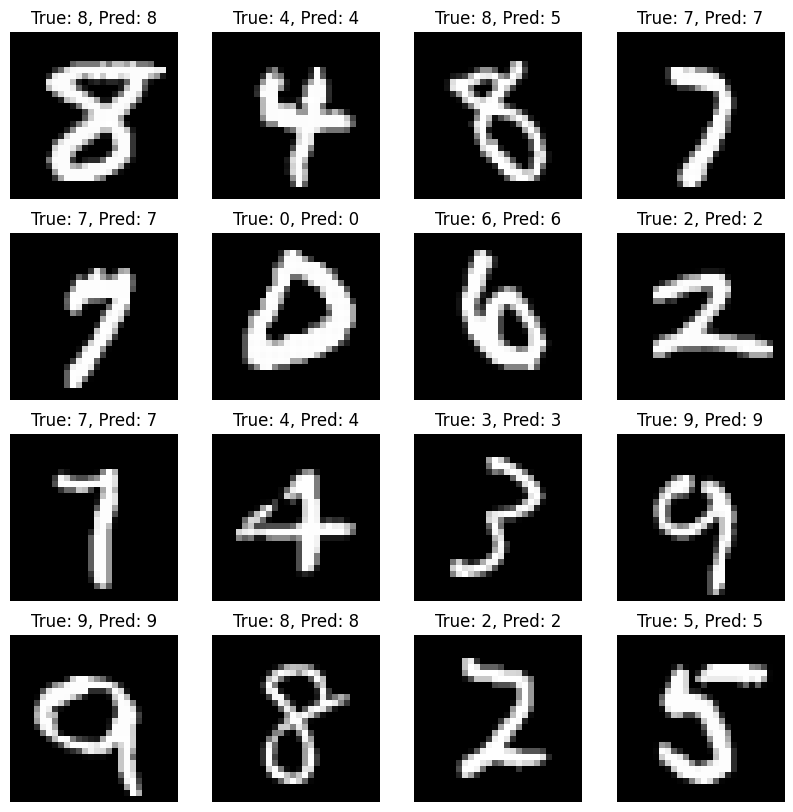

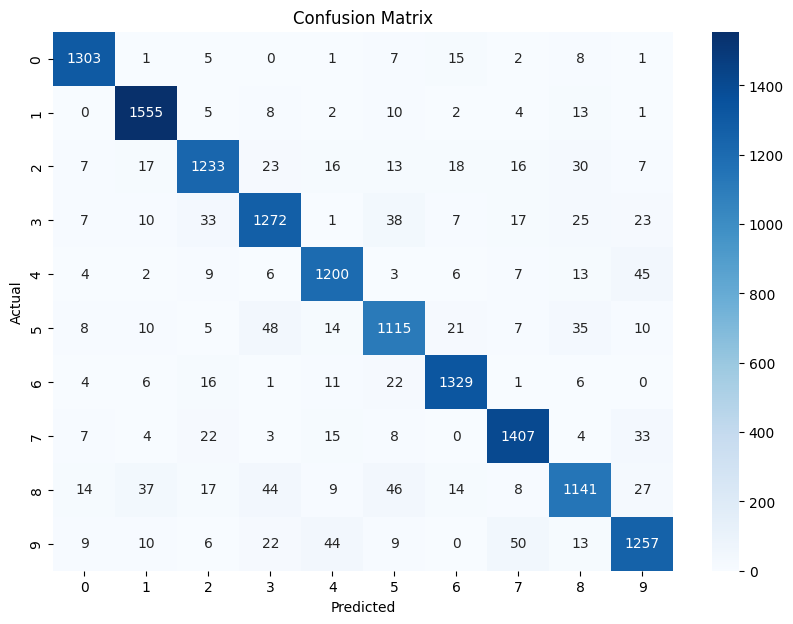

In [10]:
# Visualize some of the test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test.iloc[i]}, Pred: {y_pred[i]}')
    plt.axis('off')
plt.show()

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 9: Save the Model

In [11]:
# Save the model to a file
joblib.dump(model, 'mnist_logistic_regression_model.pkl')

# Load the model from a file
# model = joblib.load('mnist_logistic_regression_model.pkl')

['mnist_logistic_regression_model.pkl']